<h1>PRÁCTICA 3</h1>
<h2>Imports y configuración del Notebook</h2>

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
sns.set_theme(color_codes = True)

<h2>Lectura de datos</h2>

In [2]:
# Train set
data_train = pd.read_csv('dataset/train_project3.csv')
data_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,339630,Male,21,1,28.0,0,< 1 Year,Yes,44470.0,152.0,11,1
1,240794,Male,45,1,28.0,0,1-2 Year,Yes,2630.0,26.0,45,0
2,124429,Male,71,1,41.0,0,1-2 Year,Yes,2630.0,7.0,11,0
3,171989,Male,41,1,49.0,0,1-2 Year,Yes,36332.0,124.0,257,1
4,327313,Male,77,1,28.0,0,1-2 Year,Yes,42764.0,122.0,298,0
...,...,...,...,...,...,...,...,...,...,...,...,...
304882,338116,Male,27,1,50.0,1,< 1 Year,No,23983.0,152.0,160,0
304883,196666,Male,42,1,8.0,0,1-2 Year,Yes,2630.0,154.0,202,0
304884,158922,Female,35,1,28.0,1,1-2 Year,No,24799.0,124.0,13,0
304885,223891,Male,38,1,12.0,0,1-2 Year,Yes,31679.0,124.0,164,0


In [3]:
# Test set
data_test = pd.read_csv('dataset/test_project3.csv')
id_test = data_test['id']
data_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,229800,Female,23,1,46.0,0,< 1 Year,No,36669.0,152.0,157
1,38106,Male,30,1,28.0,1,< 1 Year,No,49855.0,152.0,274
2,130978,Female,23,1,8.0,1,< 1 Year,No,48102.0,26.0,146
3,128335,Female,52,1,47.0,0,1-2 Year,Yes,2630.0,156.0,183
4,120813,Male,30,1,15.0,1,< 1 Year,No,2630.0,152.0,259
...,...,...,...,...,...,...,...,...,...,...,...
76217,235206,Male,56,1,28.0,0,> 2 Years,Yes,40121.0,26.0,191
76218,121231,Female,73,1,28.0,1,1-2 Year,No,39873.0,26.0,30
76219,232171,Male,26,1,17.0,1,< 1 Year,No,2630.0,152.0,75
76220,164328,Female,56,1,30.0,1,1-2 Year,No,2630.0,160.0,140


In [4]:
id_test

0        229800
1         38106
2        130978
3        128335
4        120813
          ...  
76217    235206
76218    121231
76219    232171
76220    164328
76221    181824
Name: id, Length: 76222, dtype: int64

<h2>Explorar datos</h2>

<p>
En este análisis, se exploran las variadas distribuciones presentes en los datos relacionados con la variable 'Response'. Se observa claramente que esta variable, que representa la respuesta que buscamos predecir, presenta un desequilibrio notable: aproximadamente un 87% de los datos corresponden a la clase '0', mientras que solo alrededor del 13% pertenecen a la clase '1'. Este desbalance puede influir significativamente en la capacidad predictiva del modelo, ya que la menor representación de una clase puede conducir a un aprendizaje sesgado o ineficaz para esa categoría.

Otro detalle a tener en cuenta es que, al revisar la columna que describe las primas ('premium'), vemos que sus datos no siguen una distribución normal. Pero para nuestro caso, donde usaremos combinaciones de modelos sencillos, como en Adaboost, no es crucial que esos datos sigan una distribución normal. 
</p>    

Response 0:
count    267573.000000
mean        154.296697
std          83.631461
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64
Response 1:
count    37314.000000
mean       154.163880
std         83.691171
min         10.000000
25%         82.000000
50%        154.000000
75%        226.000000
max        299.000000
Name: Vintage, dtype: float64


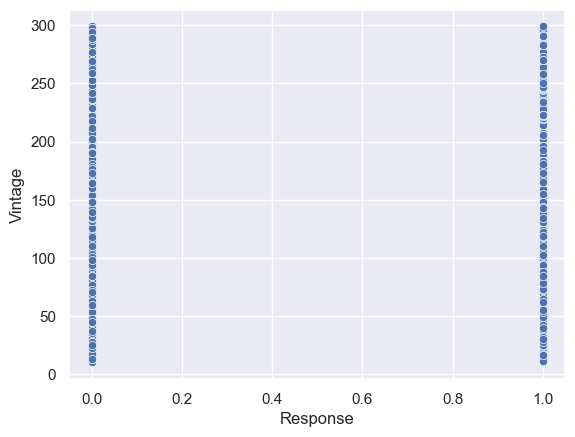

In [5]:
# Response - Vintage
# Response: 0 -> Clientes no interesados. 
#           1 -> Clientes interesados.
# Vintage: Número de días que el cliente ha estado asociado a la compañía

sns.scatterplot(data = data_train, x = "Response", y = "Vintage")

print("Response 0:")
print(data_train[data_train["Response"] == 0]["Vintage"].describe())
print("Response 1:")
print(data_train[data_train["Response"] == 1]["Vintage"].describe())

Response 0:
count    267573.000000
mean        114.906766
std          53.306753
min           1.000000
25%          64.000000
50%         152.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64
Response 1:
count    37314.000000
mean        91.725492
std         55.981814
min          1.000000
25%         26.000000
50%        124.000000
75%        125.000000
max        163.000000
Name: Policy_Sales_Channel, dtype: float64


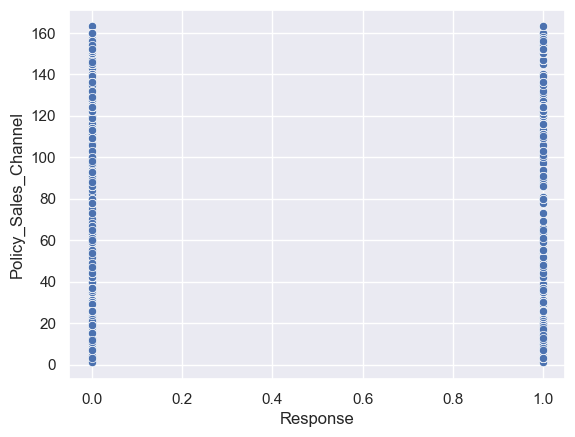

In [6]:
# Response - Policy Sales Channel
# Response: 0 -> Clientes no interesados. 
#           1 -> Clientes interesados.
# Policy_Sales_Channel: Código que indica el canal de contacto con el cliente

sns.scatterplot(data = data_train, x = "Response", y = "Policy_Sales_Channel")

print("Response 0:")
print(data_train[data_train["Response"] == 0]["Policy_Sales_Channel"].describe())
print("Response 1:")
print(data_train[data_train["Response"] == 1]["Policy_Sales_Channel"].describe())

Response 0:
count    267573.000000
mean      30410.945776
std       16967.903212
min        2630.000000
25%       24340.000000
50%       31491.000000
75%       39111.000000
max      540165.000000
Name: Annual_Premium, dtype: float64
Response 1:
count     37314.000000
mean      31617.554886
std       18706.583063
min        2630.000000
25%       24890.000000
50%       33021.500000
75%       41341.750000
max      540165.000000
Name: Annual_Premium, dtype: float64


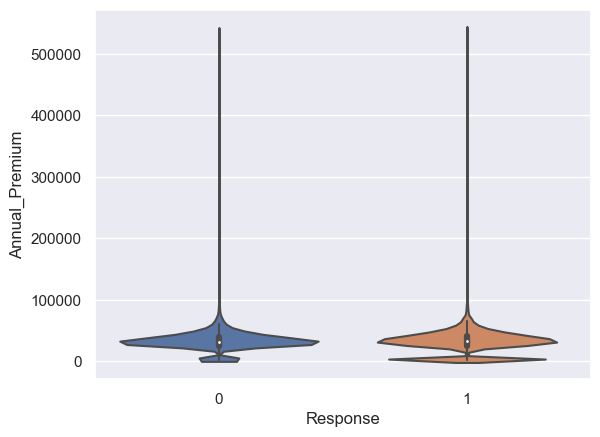

In [7]:
# Response - Annual Premium
# Response: 0 -> Clientes no interesados. 
#           1 -> Clientes interesados.
# Annual_Premium: Dinero que paga anualmente un cliente premium

sns.violinplot(data = data_train, x = "Response", y = "Annual_Premium")

print("Response 0:")
print(data_train[data_train["Response"] == 0]["Annual_Premium"].describe())
print("Response 1:")
print(data_train[data_train["Response"] == 1]["Annual_Premium"].describe())

Response 0:
No     149925
Yes    117648
Name: Vehicle_Damage, dtype: int64
Response 1:
Yes    36510
No       804
Name: Vehicle_Damage, dtype: int64


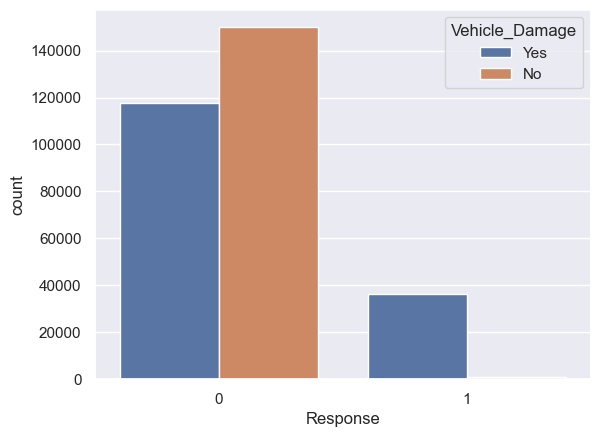

In [8]:
# Response - Vehicle Damage
# Response: 0 -> Clientes no interesados. 
#           1 -> Clientes interesados.
# Vehicle_Damage: 0 -> El cliente no ha tenido el coche roto previamente
#                 1 -> El cliente ha tenido el coche roto previamente

sns.countplot(data = data_train, x = "Response", hue = "Vehicle_Damage")

print("Response 0:")
print(data_train[data_train["Response"] == 0]["Vehicle_Damage"].value_counts())
print("Response 1:")
print(data_train[data_train["Response"] == 1]["Vehicle_Damage"].value_counts())

Response 0:
1-2 Year     132329
< 1 Year     126160
> 2 Years      9084
Name: Vehicle_Age, dtype: int64
Response 1:
1-2 Year     27790
< 1 Year      5751
> 2 Years     3773
Name: Vehicle_Age, dtype: int64


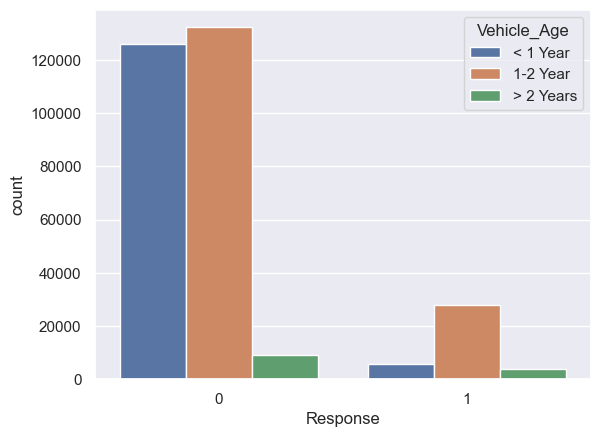

In [9]:
# Response - Vehicle Age
# Response: 0 -> Clientes no interesados. 
#           1 -> Clientes interesados.
# Vehicle_Age: Edad del vehículo

sns.countplot(data = data_train, x = "Response", hue = "Vehicle_Age")

print("Response 0:")
print(data_train[data_train["Response"] == 0]["Vehicle_Age"].value_counts())
print("Response 1:")
print(data_train[data_train["Response"] == 1]["Vehicle_Age"].value_counts())

Response 0:
1    139339
0    128234
Name: Previously_Insured, dtype: int64
Response 1:
0    37184
1      130
Name: Previously_Insured, dtype: int64


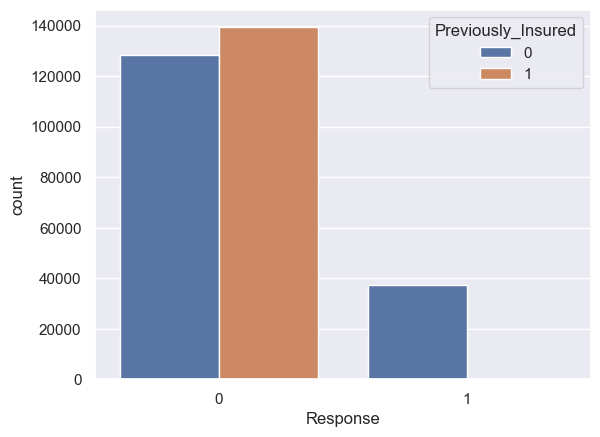

In [10]:
# Response - Previously Insured
# previamente
# Response: 0 -> Clientes no interesados. 
#           1 -> Clientes interesados.
# Previously_Insured: 0 -> El cliente no tiene seguro de vehículo
#                     1 -> El cliente tiene seguro de vehículo

sns.countplot(data = data_train, x = "Response", hue = "Previously_Insured")

print("Response 0:")
print(data_train[data_train["Response"] == 0]["Previously_Insured"].value_counts())
print("Response 1:")
print(data_train[data_train["Response"] == 1]["Previously_Insured"].value_counts())

Response 0:
count    267573.000000
mean         38.165293
std          15.816552
min          20.000000
25%          24.000000
50%          34.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64
Response 1:
count    37314.000000
mean        43.405183
std         12.148690
min         20.000000
25%         35.000000
50%         43.000000
75%         51.000000
max         83.000000
Name: Age, dtype: float64


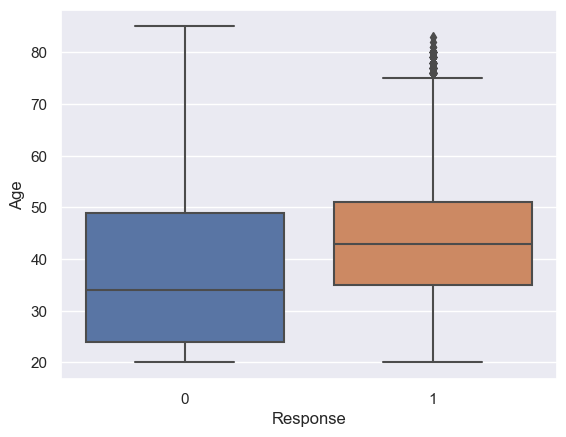

In [11]:
# Response - Age -> Cantidad de personas interesadas/no interesadas respecto a la edad de los clientes
# Response: 0 -> Clientes no interesados. 
#           1 -> Clientes interesados.
# Age: Edad del cliente

sns.boxplot(data = data_train, x = "Response", y = "Age")

print("Response 0:")
print(data_train[data_train["Response"] == 0]["Age"].describe())
print("Response 1:")
print(data_train[data_train["Response"] == 1]["Age"].describe())

Response 0:
1    266967
0       606
Name: Driving_License, dtype: int64
Response 1:
1    37283
0       31
Name: Driving_License, dtype: int64


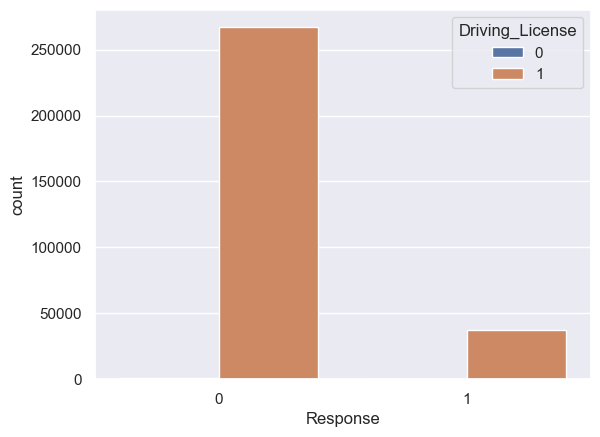

In [12]:
# Response - Driving License -> Cantidad de personas interesadas/no interesadas respecto a si tienen o no licencia
# Response: 0 -> Clientes no interesados. 
#           1 -> Clientes interesados.
# Driving_License: 0 -> El cliente no tiene licencia
#                  1 -> El cliente tiene licencia

sns.countplot(data = data_train, x = "Response", hue = "Driving_License")

print("Response 0:")
print(data_train[data_train["Response"] == 0]["Driving_License"].value_counts())
print("Response 1:")
print(data_train[data_train["Response"] == 1]["Driving_License"].value_counts())

count    304887.000000
mean      30558.618232
std       17194.655845
min        2630.000000
25%       24397.000000
50%       31667.000000
75%       39405.000000
max      540165.000000
Name: Annual_Premium, dtype: float64


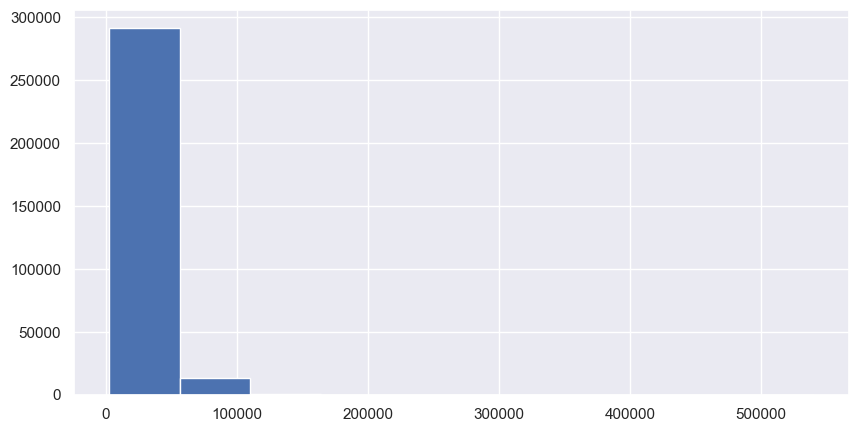

In [13]:
#No siguen una distribución normal 
#data_train['Annual_Premium'] = np.log1p(data_train['Annual_Premium'])

# Histograma de Annual Premium en 10 bins
data_train['Annual_Premium'].hist(bins = 10, figsize = (10, 5))

print(data_train['Annual_Premium'].describe())

0    267573
1     37314
Name: Response, dtype: int64

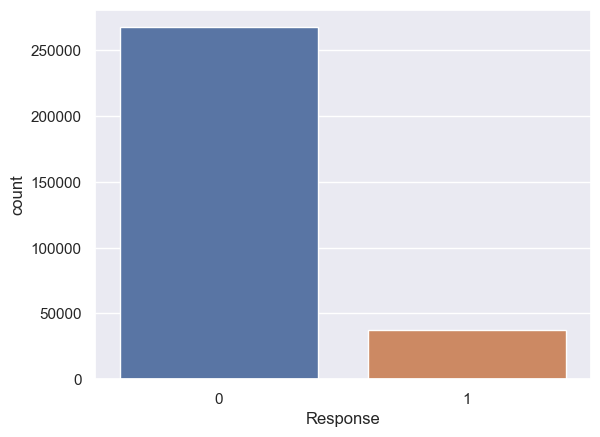

In [14]:
# Response: 0 -> Clientes no interesados. 
#           1 -> Clientes interesados.

sns.countplot(x = data_train['Response'])
data_train['Response'].value_counts()

<h2>Preprocesamiento de los datos</h2>

<p>Para facilitar el procesamiento de los datos, implementaremos las siguientes acciones:</p>
<ul>
    <li>
        <b>convert_categorical_to_numeric:</b>
        Conversión de variables categóricas a numéricas para mejorar su utilización por parte de los modelos.
    </li>
    <br>
    <li>
        <b>remove_user_identification:</b>
        Eliminación de identificadores de usuarios que no agregan valor al modelo de machine learning.
    </li>
</ul>

<p>A continuación, detallamos cómo modficaremos algunas de las variables específicas:</p>

<ul>
    <li>
        <b>Gender:</b>
        Transformaremos el género a una representación numérica asignando valores binarios a cada sexo.
    </li>
    <br>
    <li>
        <b>Vehicle_Age:</b>
        La categoría de la antigüedad del vehículo será transformada de manera similar. Contamos con tres opciones: '< 1 año', '1-2 años' y '> 2 años', a las cuales asignaremos valores del 0 al 2.
    </li>
    <br>
    <li>
        <b>Vehicle_Damage:</b>
        Al igual que con 'Género', asignaremos valores binarios a esta variable en función de si el coche ha sufrido daños o no.
    </li>
</ul>

In [15]:
# Ver el número de valores únicos del train set
data_train.nunique()

id                      304887
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           46344
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [16]:
# Identificar variables categóricas
print("Train: ", data_train.select_dtypes(include = ['object', 'category']).columns.tolist())
print("Test: ", data_test.select_dtypes(include = ['object', 'category']).columns.tolist())

Train:  ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
Test:  ['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [17]:
# Eliminar id
data_train.drop('id', axis = 1, inplace = True)
data_test.drop('id', axis = 1, inplace = True)

In [18]:
# Convertir Gender en variable numérica usando LabelEncoder
label_encoder = preprocessing.LabelEncoder()
data_train['Gender'] = label_encoder.fit_transform(data_train['Gender'])
data_train['Gender'].unique()

data_test['Gender'] = label_encoder.fit_transform(data_test['Gender'])
data_test['Gender'].unique()

array([0, 1])

In [19]:
# Convertir Vehicle Age en variable numérica usando LabelEncoder
data_train['Vehicle_Age'] = label_encoder.fit_transform(data_train['Vehicle_Age'])
data_train['Vehicle_Age'].unique()

data_test['Vehicle_Age'] = label_encoder.fit_transform(data_test['Vehicle_Age'])
data_test['Vehicle_Age'].unique()

array([1, 0, 2])

In [20]:
# Convertir Vehicle Damage en variable numérica usando LabelEncoder
data_train['Vehicle_Damage'] = label_encoder.fit_transform(data_train['Vehicle_Damage'])
data_train['Vehicle_Damage'].unique()

data_test['Vehicle_Damage'] = label_encoder.fit_transform(data_test['Vehicle_Damage'])
data_test['Vehicle_Damage'].unique()

array([0, 1])

In [21]:
# Comprobar el tipo de las variables del train set para ver si se ha realizado bien el LabelEncoder
data_train.dtypes

Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [22]:
# Comprobar el tipo de las variables del test set para ver si se ha realizado bien el LabelEncoder
data_test.dtypes

Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

<h2>Boosting Classifier Model</h2>
Boosting (https://en.wikipedia.org/wiki/Boosting_(machine_learning)): técnica de aprendizaje automático que consiste en entrenar múltiples modelos (weak models) secuencialmente para obtener un modelo general strong model. Podemos definir un weak learner o weak modelo como un clasificador que está ligeramente correlacionado con problema final y que es mejor que intentar acertarlo aleatoriamente, es decir, que no debe ver todo el problema sener. La idea es que cada weak model se centra en una feature concreta o en arreglar los errores del clasificador anterior.

<li>
        <b>Fit: </b>
<p>En primer lugar, asignamos pesos a cada fila para cada iteración. Dado el desequilibrio de datos y nuestro enfoque         en predecir los '1', asignamos a estas filas el inverso de su proporción. Esto ayuda a que el modelo se centre más         en predecir correctamente los '1' para contrarrestar el desequilibrio.

El algoritmo usa un 'Weak Learner', en nuestro caso Decision Tree Classifier, con pesos iniciales anteriormete especificados. Luego, se hace la predicción y se calcula el error usando la fórmula:

Error = predicciones incorrectas / número total de muestras

Como las predicciones tienen diferentes errores, las que tienen errores más bajos tienen más peso en la predicción final. Calculamos el 'Learning rate' de cada 'Weak Learner' con la fórmula:

0.5 * np.log((1 - Error) / Error)

En cada iteración, actualizamos los pesos individuales de las filas. Aumentamos los pesos de las predicciones incorrectas para que el algoritmo se enfoque más en mejorarlas en la siguiente iteración. A la vez, reducimos los pesos de las predicciones correctas para que no tengan tanto impacto, ya que ya se han predicho correctamente.

Pesos de predicciones incorrectas = pesos individuales * np.exp(error_weight)
Pesos de predicciones correctas = pesos individuales * np.exp(-error_weight)

Finalmente normalizamos los pesos para que sus valores no crezcan demasiado.</p>
</li>
<li>
 <b>Predict: </b>
    <p>Para cada "weak learner" , se generan predicciones sobre el conjunto de datos de entrada X. Estas predicciones se almacenan en un array y_preds como una matriz, donde cada fila corresponde a las predicciones de un "weak learner" específico para cada muestra de entrada. Se transpone la matriz y_preds para facilitar el siguiente cálculo.
        
Cada predicción generada por cada "weak learner" tiene asociado un peso (self.wl_weights). Se realiza una multiplicación matricial entre la matriz transpuesta de predicciones (y_preds) y los pesos para cada "weak learner". Esta operación multiplica las predicciones por los pesos asignados a cada uno de los modelos.
        
Cada predicción generada por cada "weak learner" tiene asociado un peso (self.wl_weights). Se realiza una multiplicación matricial entre la matriz transpuesta de predicciones (y_preds) y los pesos para cada "weak learner". Esta operación multiplica las predicciones por los pesos asignados a cada uno de los modelos.
        
Se aplica la función de signo a la matriz resultante de la multiplicación (sumando las predicciones ponderadas). Esto asigna el valor +1 si el resultado es positivo o 0, y -1 si el resultado es negativo. Luego, se aplanan las predicciones para obtener un array unidimensional que contiene las predicciones finales del modelo para el conjunto de datos de entrada X.
    </p>
    
</li>

In [23]:
# Calcular pesos negativos para dar más importancia a los pesos de Response == 1
weight_0 = 1 - (data_train[data_train['Response'] == 0].shape[0] / data_train['Response'].shape[0])
weight_1 = 1 - (data_train[data_train['Response'] == 1].shape[0] / data_train['Response'].shape[0])

# Asignar los pesos en una nueva columna según su Response
data_train['Sample_weight'] = np.where(data_train['Response'] == 0, weight_0, weight_1)
data_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Sample_weight
0,1,21,1,28.0,0,1,1,44470.0,152.0,11,1,0.877614
1,1,45,1,28.0,0,0,1,2630.0,26.0,45,0,0.122386
2,1,71,1,41.0,0,0,1,2630.0,7.0,11,0,0.122386
3,1,41,1,49.0,0,0,1,36332.0,124.0,257,1,0.877614
4,1,77,1,28.0,0,0,1,42764.0,122.0,298,0,0.122386
...,...,...,...,...,...,...,...,...,...,...,...,...
304882,1,27,1,50.0,1,1,0,23983.0,152.0,160,0,0.122386
304883,1,42,1,8.0,0,0,1,2630.0,154.0,202,0,0.122386
304884,0,35,1,28.0,1,0,0,24799.0,124.0,13,0,0.122386
304885,1,38,1,12.0,0,0,1,31679.0,124.0,164,0,0.122386


In [24]:
class Boosting_Classifier:
    def __init__(self, base_learner, T = 100):
        """
        Inicializa el clasificador Boosting.

        Parámetros:
        - base_learner: El modelo base o clasificador débil a utilizar.
        - T: Número de iteraciones (modelos débiles a entrenar). Por defecto, T = 100.
        """
        
        self.T = T
        self.base_learner = base_learner
        
    def fit(self, X_train, y_train, weights):
        """
        Entrena el modelo de Boosting.

        Parámetros:
        - X_train: Datos de entrenamiento.
        - y_train: Etiquetas de los datos de entrenamiento.
        - weights: Pesos iniciales para las muestras de entrenamiento.
        """
        
        self.weights = weights # Pesos
        self.weak_learner = [] # Weak lerners de cada iteración
        self.wl_weights = [] # Peso que debe tener cada weak learner     
        
        # Para cada iteración
        for i in range(self.T):
            # Entrenar el modelo con los nuevos pesos y añadir el clasificador débil
            wl = self.base_learner.fit(X_train,y_train,sample_weight=self.weights)
            self.weak_learner.append(wl)
            
            # Error de la prediccion
            # Calcular la máscara de predicciones erróneas
            incorrect = wl.predict(X_train) != y_train
            #print("cantidad de valores incorrectos" ,np.sum(incorrect == 1))
            # Calcular el error de predicción
            errt = np.sum(self.weights * incorrect) / np.sum(self.weights, axis = 0)
            
            # Learning rate
            wlw = 0.5 * np.log((1 - errt) / errt)
            self.wl_weights.append(wlw)
            
            #Actualizar los weights con w * e^(wlw) 
            # Multiplicar por incorrect porque solo se quiere modificar los pesos locales de las predicciones 
            # que no son correctas
            self.weights = self.weights * np.exp(wlw * incorrect)               
                        
            # Reducir los pesos de las predicciones correctas para que los siguientes weak learners se centren más en 
            #los valores incorrectos, además de normalizar los pesos
            incorrect_invertido = np.logical_not(incorrect.astype(bool))
            incorrect_invertido = incorrect.astype(int)
            self.weights = self.weights  *np.exp(-wlw * incorrect_invertido)
            
            # Normalizar los pesos
            self.weights =  self.weights / np.sum(self.weights)
            
        self.weak_learner = np.array(self.weak_learner)
        self.wl_weights = np.array(self.wl_weights)
            
    def predict(self, X):
        """
        Realiza predicciones con el modelo de Boosting entrenado.

        Parámetros:
        - X: Datos de entrada para realizar las predicciones.

        Retorna:
        - Predicciones realizadas por el modelo entrenado.
        """
        
        # Predicciones de todos los weak learners
        y_preds = np.array([wl.predict(X) for wl in self.weak_learner])
        
        # Transponer para facilitar el cálculo siguiente
        y_preds = y_preds.T
        
        # Multiplicación matricial de predicciones y pesos
        weighted_preds = y_preds @ self.wl_weights
        
        # Aplicar la función de signo y aplanar
        predictions = np.sign(weighted_preds.flatten())
        
        return predictions
    
    def get_accuracy(self, y_train, y):
        """
        Calcula la precisión (accuracy) de la predicción.

        :param y_train: Valores verdaderos.
        :param y: Valores predichos.
        :return: La precisión (accuracy) de la predicción.
        """
        
        acc = accuracy_score(y, y_train)
        return acc
    
    def get_precision(self, y, y_pred):
        """
        Calcula la precisión (precision) de la predicción.

        :param y: Valores verdaderos.
        :param y_pred: Valores predichos.
        :return: La precisión (precision) de la predicción.
        """
        
        return(precision_score(y,y_pred))
    
    def get_recall(self, y, y_pred):
        """
        Calcula la exhaustividad (recall) de la predicción.

        :param y: Valores verdaderos.
        :param y_pred: Valores predichos.
        :return: La exhaustividad (recall) de la predicción.
        """
        
        return recall_score(y, y_pred)
    
    def get_F1(self, y, y_pred):
        """
        Calcula la puntuación F1 de la predicción.

        :param y: Valores verdaderos.
        :param y_pred: Valores predichos.
        :return: La puntuación F1 de la predicción.
        """
        
        return f1_score(y, y_pred)
    
    def get_ROC_AUC(self, y, y_pred):
        """
        Calcula el área bajo la curva ROC (ROC AUC) de la predicción.

        :param y: Valores verdaderos.
        :param y_pred: Valores predichos.
        :return: El área bajo la curva ROC (ROC AUC) de la predicción.
        """
        
        return roc_auc_score(y, y_pred)

In [25]:
# Separar Response para ver si hace bien la predicción
X = data_train.drop(columns = ['Response'])
y = data_train['Response']

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento y 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Separar los pesos del set
weights = X_train['Sample_weight']
X_train.drop(columns = ['Sample_weight'], inplace = True)
X_test.drop(columns = ['Sample_weight'], inplace = True)

X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
46787,0,22,1,47.0,1,1,0,29149.0,152.0,132
5055,0,26,1,25.0,1,1,0,22299.0,152.0,71
75429,1,24,1,45.0,1,1,0,18125.0,152.0,231
113452,1,73,1,15.0,1,0,0,2630.0,124.0,186
147275,1,23,1,17.0,1,1,0,29681.0,152.0,149
...,...,...,...,...,...,...,...,...,...,...
119879,0,25,1,20.0,0,1,1,2630.0,152.0,232
259178,1,33,1,15.0,1,1,0,25094.0,152.0,202
131932,1,50,1,28.0,1,0,0,31599.0,26.0,59
146867,0,34,1,6.0,0,0,1,29905.0,124.0,196


In [26]:
# Clasificador de árbol de decisiones con profundidad máxima de 7
tree_clf = DecisionTreeClassifier(max_depth=7)

# Clasificador Boosting con DecisionTreeClassifier como clasificador base y 150 iteraciones.
model = Boosting_Classifier(tree_clf, 150)
model.fit(X_train, y_train, weights)

In [27]:
# Predecir el test set
y_pred = model.predict(X_test)

# Obtener las precisiones, exhaustividad, F1 y ROC
acc = model.get_accuracy(y_test, y_pred)
pre = model.get_precision(y_test, y_pred)
rec = model.get_recall(y_test, y_pred)
f1 = model.get_F1(y_test, y_pred)
roc_auc = model.get_ROC_AUC(y_test, y_pred)

print("Accuracy: ", round(acc, 4))
print("Precision: ", round(pre, 4))
print("Recall: ", round(rec, 4))
print("F1: ", round(f1, 4))
print("ROC AUC: ", round(roc_auc, 4))

Accuracy:  0.6817
Precision:  0.2683
Recall:  0.9384
F1:  0.4174
ROC AUC:  0.7923


In [29]:
X = data_test
y_pred = model.predict(X)
df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['id','Response']
df_output['id'] = id_test
df_output.to_csv('output/session3/baseline.csv',index = False)

Práctica realizada por Carlos Gómez Domínguez, Pablo Noriega Vázquez y Adrián Galán Pacheco.